In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show


In [0]:
df1=pd.read_csv('gdrive/My Drive/520_proj/preFinal/CIS_520_PROJECT_DATA/Train_without_LDA_preserveing_rows.csv')


In [0]:
df1.recommendations.value_counts()

0.0     26356
1.0     20534
2.0     15705
3.0     11955
4.0      9389
5.0      7483
6.0      6130
7.0      5066
8.0      4375
9.0      3645
10.0     3153
11.0     2687
12.0     2408
13.0     2141
14.0     1826
15.0     1686
16.0     1463
17.0     1275
18.0     1239
19.0     1042
20.0     1013
21.0      939
22.0      810
23.0      780
24.0      647
26.0      600
25.0      597
27.0      545
28.0      508
29.0      486
30.0      427
31.0      405
32.0      405
34.0      343
35.0      337
33.0      328
37.0      320
38.0      306
36.0      295
39.0      279
40.0      258
41.0      254
42.0      225
43.0      212
47.0      206
44.0      194
46.0      192
45.0      191
49.0      174
48.0      160
Name: recommendations, dtype: int64

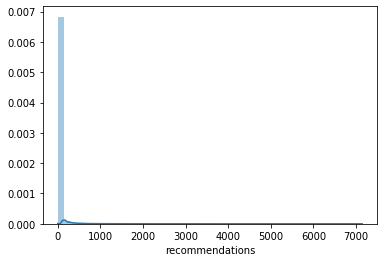

In [0]:
sns.distplot(df1.recommendations) #######

In [0]:
train=pd.read_csv('gdrive/My Drive/520_proj/preFinal/subSamplesTrain.csv')
train.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1484106834,587575d295d0e0392607a033,1254.0,"Why isn't this the lead?<br/>""The memos descri...",21059310.0,21059310.0,<br/>,comment,1.484102e+09,1.0,0,0,National,0.0,NaN,21059310,https://graphics8.nytimes.com/images/apps/time...,1,17.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1484106834,TRT,4188784.0,Illinois,NaN,NaN,News
1,1483642395,586d000995d0e03926078eb2,1233.0,Then clearly the better solution is to sit on ...,20991167.0,20991167.0,<br/>,userReply,1.483591e+09,2.0,0,20988247,Upshot,20988247.0,vbering,20988247:20991167,https://graphics8.nytimes.com/images/apps/time...,3,3.0,NaN,0.0,NaN,Unknown,0,approved,1.0,0.0,1483642395,Raindrop,72495362.0,US,NaN,NaN,News
2,1483873683,5870f3c195d0e039260797a9,3637.0,It's just so discouraging to think/know I'll h...,21029387.0,21029387.0,<br/>,comment,1.483865e+09,1.0,0,0,National,0.0,NaN,21029387,https://graphics8.nytimes.com/images/apps/time...,1,31.0,NaN,0.0,NaN,Politics,1,approved,1.0,0.0,1483873683,gordy,34095067.0,CA,NaN,NaN,News
3,1484329569,5876ba6195d0e0392607a37c,999.0,"In the short term, you always have to trade of...",21094261.0,21094261.0,<br/>,comment,1.484330e+09,1.0,0,0,Upshot,0.0,NaN,21094261,https://graphics8.nytimes.com/images/apps/time...,1,1.0,NaN,5.0,NaN,Unknown,0,approved,1.0,0.0,1484329569,Chao,7949090.0,"Lafayette, CO",NaN,NaN,News
4,1484170327,58761acf95d0e0392607a191,810.0,"Jamespb4, you just won my ""human"" award for to...",21071133.0,21071133.0,<br/>,userReply,1.484170e+09,2.0,0,21070865,Upshot,21070865.0,Jamespb4,21070865:21071133,https://graphics8.nytimes.com/images/apps/time...,3,22.0,NaN,0.0,NaN,Unknown,0,approved,1.0,1.0,1484170327,njglea,60025659.0,Seattle,NaN,NaN,News


In [0]:
df_eda=  df1[['174',
  'createDate',
 'articleWordCount',
 'depth',
 'recommendations',
 'replyCount',
 'userTitleRC',
 'userIDRC',
 'editorsSelection',
 'ratio_comment_article',
 'word_count',
 'comment',
 'reporterReply',
 'userReply']]

In [0]:
df_eda.describe()

,174,createDate,articleWordCount,depth,recommendations,replyCount,userTitleRC,userIDRC,editorsSelection,ratio_comment_article,word_count,comment,reporterReply,userReply
count,151202.000000,1.512020e+05,151202.000000,151202.000000,151202.000000,151202.000000,151202.000000,151202.000000,151202.000000,146876.000000,151202.000000,151202.000000,151202.000000,151202.000000
mean,0.051133,8.179575e+04,1227.037777,1.255142,20.741075,0.463493,0.000331,20.743758,0.018697,81.572642,432.891251,0.746941,0.000053,0.253006
std,0.633504,7.785789e+05,795.801593,0.440695,109.898691,2.357134,0.059760,69.802597,0.135453,125.345541,375.498719,0.434766,0.007274,0.434736
min,-0.999400,0.000000e+00,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,2.000000,0.000000,0.000000,0.000000
25%,-0.540950,9.314000e+03,832.000000,1.000000,1.000000,0.000000,0.000000,3.159420,0.000000,26.538462,152.000000,0.000000,0.000000,0.000000
50%,0.000000,2.301800e+04,1087.000000,1.000000,4.000000,0.000000,0.000000,7.392857,0.000000,40.839286,316.000000,1.000000,0.000000,0.000000
75%,0.644875,4.986375e+04,1430.000000,2.000000,10.000000,0.000000,0.000000,16.750000,0.000000,72.000000,592.000000,1.000000,0.000000,1.000000
max,0.999100,3.657548e+07,16336.000000,3.000000,7142.000000,335.000000,15.000000,7142.000000,1.000000,939.000000,1997.000000,1.000000,1.000000,1.000000


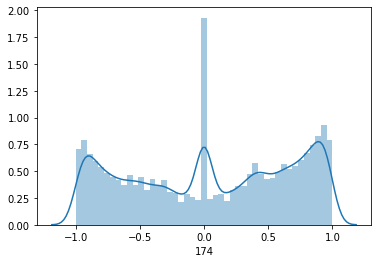

In [0]:
#plt.scatter( '174' ,'recommendations', data=df_eda, linestyle='-', marker='o')
sns.distplot(df_eda['174']);

# plt.xlabel("sentiment")
# plt.ylabel("recommendations")
# plt.show()

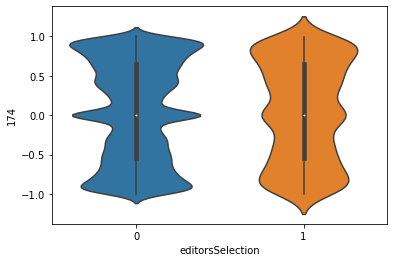

In [0]:
ax = sns.violinplot(x="editorsSelection", y="174", data=df_eda)

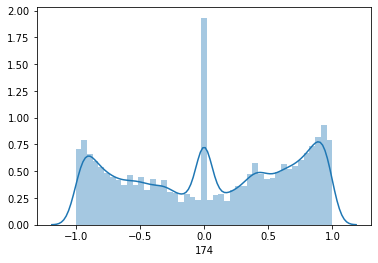

In [0]:
sns.distplot(df_eda[df_eda['editorsSelection']==0]['174']); ## for False

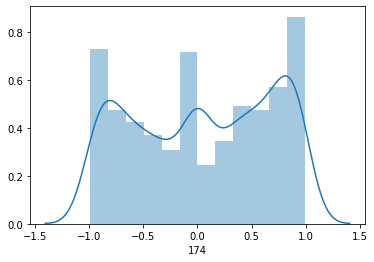

In [0]:
sns.distplot(df_eda[df_eda['editorsSelection']==1]['174']); ## for true

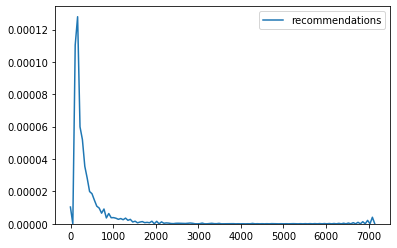

In [0]:
sns.kdeplot(
    df_eda['recommendations'],
    # kind='scatter' # or 'kde' or 'hex'
)
# sns.pairplot(df_eda['recommendations'])

In [0]:
# sums = df_eda.editorsSelection
# axis('equal');
# pie(sums);
# show()
df1.depth.value_counts()

1.0    112939
2.0     37948
3.0       315
Name: depth, dtype: int64

<BarContainer object of 2 artists>

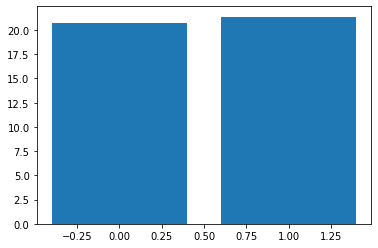

In [0]:
a1 = df_eda[df_eda['editorsSelection']==1].recommendations.mean()
a2 = df_eda[df_eda['editorsSelection']==0].recommendations.mean()
plt.bar([1,0], [a1,a2])

(-1.1029348293816283,
 1.100331088148356,
 -1.1010049278264027,
 1.1057434751080812)

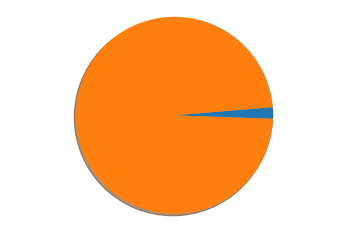

In [0]:
fig1, ax1 = plt.subplots()   #######
ax1.pie([len(df_eda[df_eda['editorsSelection']==1]),len(df_eda[df_eda['editorsSelection']==0])] ,  shadow=True, startangle=-2)
ax1.axis('equal') 

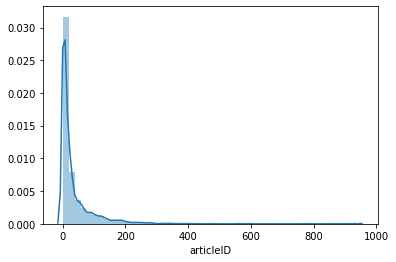

In [0]:
vc=train['articleID'].value_counts()
sns.distplot(vc);

In [0]:
train['commentType'].value_counts()

comment          112939
userReply         38253
reporterReply         8
Name: commentType, dtype: int64

Text(0, 0.5, 'avg_recommendations')

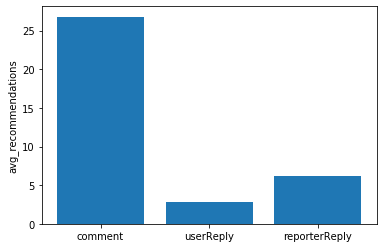

In [0]:
a1 = train[train['commentType']=='comment'].recommendations.mean()
a2 = train[train['commentType']=='userReply'].recommendations.mean()
a3 = train[train['commentType']=='reporterReply'].recommendations.mean()
plt.bar(['comment','userReply','reporterReply'], [a1,a2,a3])
plt.ylabel('avg_recommendations')

In [0]:
a=train[['recommendations','replyCount']].groupby(['replyCount'])['recommendations'].mean()

In [0]:
temp=pd.DataFrame()
temp['recommendation_avg']=train[['recommendations','replyCount']].groupby(['replyCount'])['recommendations'].mean()
temp['reply_counts']=train['replyCount'].unique()

(0, 100)

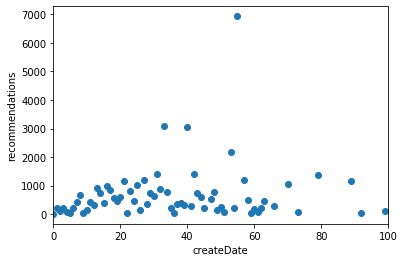

In [0]:
# sns.jointplot(y="recommendation_avg", x="reply_counts", data=temp,kind='kde');
plt.scatter( y="recommendation_avg", x="reply_counts",data=temp, linestyle='-', marker='o')
plt.xlabel('createDate')
plt.ylabel('recommendations')
plt.xlim(0,100)

AttributeError: ignored

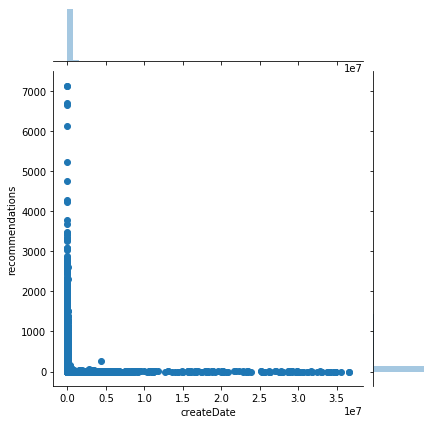

In [0]:
# a = sns.jointplot(y="recommendations", x="createDate", data=df_eda);
# # axis = a.axes
# a.set(xlim=(0, 10))
# # sns.plt.xlim(0,)
plt.scatter()

(0, 100000)

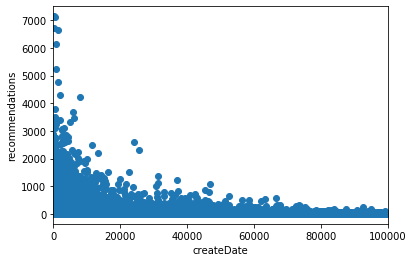

In [0]:
plt.scatter( y="recommendations", x="createDate",data=df_eda, linestyle='-', marker='o') ####
plt.xlabel('createDate')
plt.ylabel('recommendations')
plt.xlim(0,100000)

Text(0, 0.5, 'recommendations')

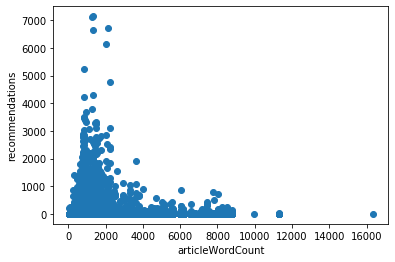

In [0]:
plt.scatter( y="recommendations", x="articleWordCount",data=df_eda, linestyle='-', marker='o') #####
plt.xlabel('articleWordCount')
plt.ylabel('recommendations')
# plt.xlim(0,100000)

In [0]:
df_eda.articleWordCount.describe()

count    151202.000000
mean       1227.037777
std         795.801593
min          11.000000
25%         832.000000
50%        1087.000000
75%        1430.000000
max       16336.000000
Name: articleWordCount, dtype: float64

In [0]:
df_eda=  df1[['174',
  'createDate',
 'articleWordCount',
 'depth',
 'recommendations',
 'replyCount',
 'userTitleRC',
 'userIDRC',
 'editorsSelection',
 'ratio_comment_article',
 'word_count',
 'comment',
 'reporterReply',
 'userReply']]
df_eda['createDate'][df_eda['createDate']>1000000]=1000000
# df_eda['createDate'].set_max(5000000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.use

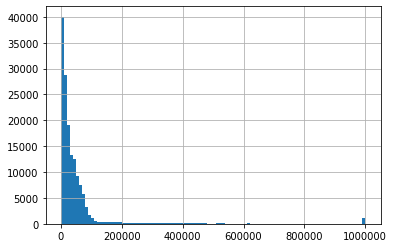

In [0]:
df_eda['createDate'].hist(bins=100)

In [0]:
df_eda['word_count'].value_counts()

124     341
76      324
98      322
74      321
75      321
       ... 
1879      1
1692      1
1624      1
1753      1
1752      1
Name: word_count, Length: 1787, dtype: int64

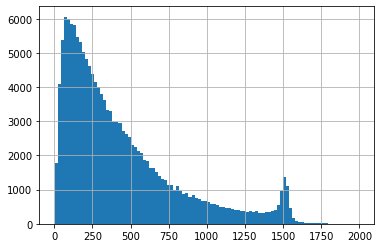

In [0]:
df_eda['word_count'].hist(bins=100)

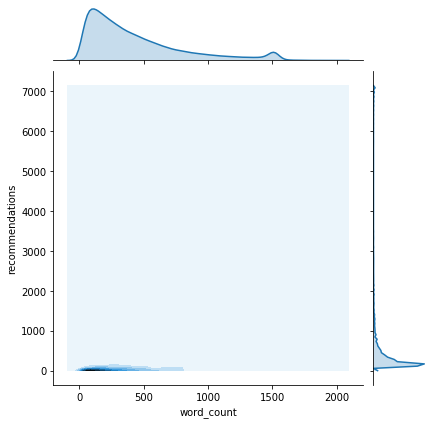

In [0]:
sns.jointplot( y="recommendations", x="word_count",data=df_eda,kind="kde")

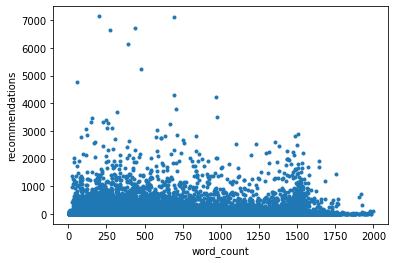

In [0]:
plt.scatter( 'word_count', 'recommendations', data=df_eda, linestyle='-', marker='.')
plt.xlabel('word_count')
plt.ylabel('recommendations')
plt.show()

[(0, 300)]

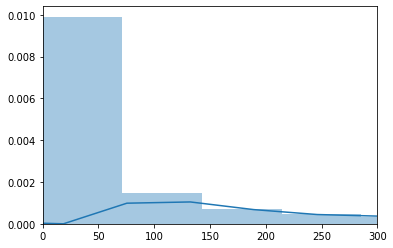

In [0]:
a = sns.distplot(df_eda.userIDRC.unique(),bins=100)
a.set(xlim=(0,300))

In [0]:
df_eda['userIDRC'][df_eda['userIDRC']>200]=200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, 

In [0]:
df_eda.ratio_comment_article.value_counts()

39.741176    10134
40.839286     4574
62.750000     4518
63.229508     3857
47.690141     3386
             ...  
0.157895         3
0.166667         2
0.200000         2
0.285714         2
0.142857         1
Name: ratio_comment_article, Length: 517, dtype: int64

[(0, 100)]

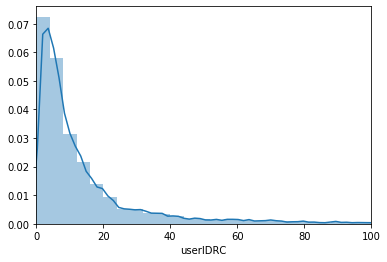

In [0]:
a = sns.distplot(df_eda.userIDRC)
a.set(xlim=(0,100))

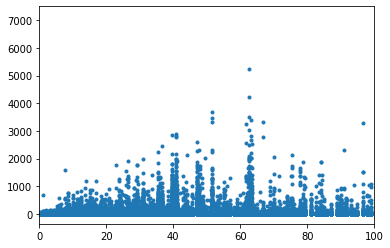

In [0]:
plt.scatter( 'ratio_comment_article', 'recommendations', data=df_eda, linestyle='-', marker='.')
plt.xlim(0,100)
plt.show()